# Buisness Problem:- Citibank defaulters

Help Citibank predict defaulters! Citibank has hired you as a Machine Learning Expert to detect default in their newly launched Citi Gold Card. They have hired you as an Machine Learning and FinTech expert. This is an extremely time sensitive and urgent project as defaulters cause substantial loss to the system. They are willing to compensate heavily! Defaulters cause annually over ~ USD 50 Billion in losses.

### Variable description

Y: Client's behavior (target); Y=0 then not default, Y=1 then default.

X1 - Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family 
    (supplementary) credit.

X2 -Gender (1 = male; 2 = female).

X3 - Education (1 = graduate school; 2 = university; 3 = high school; 0,4,5,6 = others).

X4 - Marital status (1 = married; 2 = single; 3 = divorce; 0=others).

X5 - Age (year).

X6-X11 - History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -2 = No consumption; -1 = pay duly; ; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above

X12-X17 - Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23 - Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [0]:
path = "/content/drive/My Drive/Colab Notebooks/train_1.csv"


In [0]:
path1 = '/content/drive/My Drive/Colab Notebooks/test.csv'

In [0]:
# Demonstrate imblearn package install

# !pip install imblearn

In [0]:
# import necessary libraries
import numpy as np
import pandas as pd
import csv
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
# load the train_1 dataset
citi = pd.read_csv(path)

In [0]:
# using shape to get the idea of number of columns and rows in dataset
citi.shape

(21600, 9)

In [0]:
citi.head()

,Ref.No,X1,X2,X3,X4,X5,X6,X7,Y
0,22203,320000,2,1,2,27,1,2,1
1,1288,470000,1,2,1,41,-2,-2,0
2,11822,20000,1,2,2,25,1,2,0
3,15085,80000,1,3,1,41,0,0,1
4,6192,30000,1,1,2,30,1,-2,1


In [0]:
# checking for null/ missing values
citi.isna().sum().sum()

0

In [0]:
# to get an idea of of descriptive statistics like std, mean. count, min and max, etc
citi.describe()

,Ref.No,X1,X2,X3,X4,X5,X6,X7,Y
count,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000
mean,12000.773750,165235.818519,1.626991,1.845926,1.558704,35.382361,-0.002917,-0.124028,0.223796
std,6931.541584,129013.755215,0.483616,0.781139,0.522008,9.266769,1.126164,1.201892,0.416797
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,0.000000
25%,6008.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,0.000000
50%,12001.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000
75%,17995.250000,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000
max,24000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,1.000000


In [0]:
# takind an account of datatypes we have in our dataset
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21600 entries, 0 to 21599
Data columns (total 9 columns):
Ref.No    21600 non-null int64
X1        21600 non-null int64
X2        21600 non-null int64
X3        21600 non-null int64
X4        21600 non-null int64
X5        21600 non-null int64
X6        21600 non-null int64
X7        21600 non-null int64
Y         21600 non-null int64
dtypes: int64(9)
memory usage: 1.5 MB


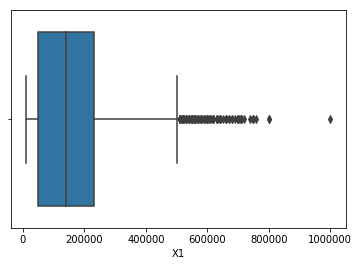

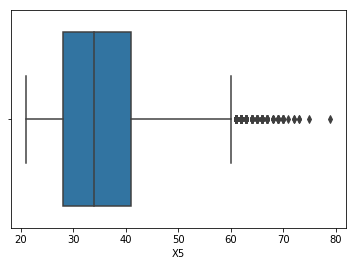

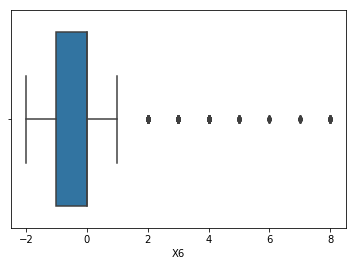

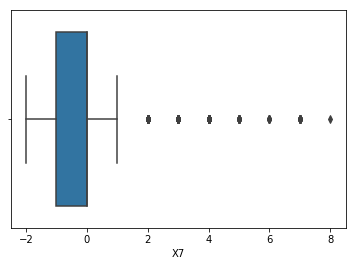

In [0]:
# creating boxplot for all numerical columns.
for col in ['X1', 'X5', 'X6', 'X7']:
    sns.boxplot(x=col, data=citi)
    plt.show()

##### Obsevations of boxplot

- on average our credit limit is somewhat between 1.5 lacs to 2 lacs shown by X1

- our dataset is comprising of people aged around 35 on average shown by X5.

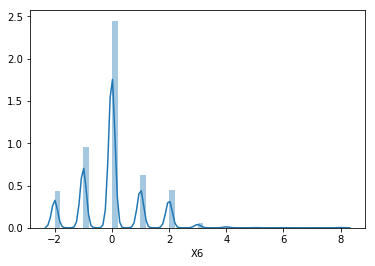

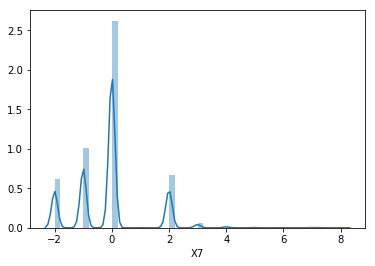

In [0]:
for i in ['X6', 'X7']:
    sns.distplot(citi[i])
    plt.show()

by observing above distplot we are getting normal curve as it have 0 mean and 1 std.

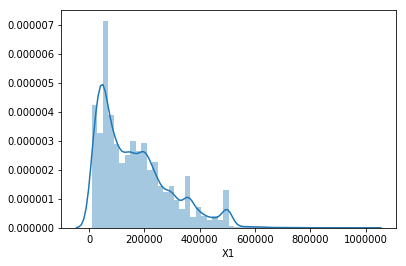

In [0]:
sns.distplot(citi.X1)

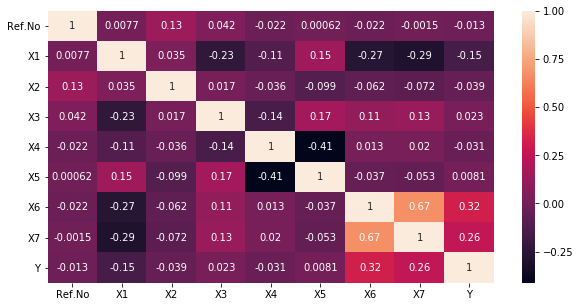

In [0]:
plt.figure(figsize=(10,5))
sns.heatmap(citi.corr(), annot = True, cbar=True)

By observing above heatmap of correlation we can surely say that our independent variables are not correlated with dependent/ target variable

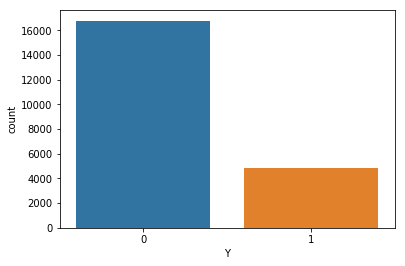

In [0]:
sns.countplot(x='Y', data=citi)

our target variable is in unbalanced state as the minority class(1) is just 22% of total data points

In [0]:
citi.Y.value_counts()

0    16766
1     4834
Name: Y, dtype: int64

In [0]:
# ref.no is not significant for our model building so we can drop it
citi.drop('Ref.No', axis = 1, inplace=True)

In [0]:
citi.head()

,X1,X2,X3,X4,X5,X6,X7,Y
0,320000,2,1,2,27,1,2,1
1,470000,1,2,1,41,-2,-2,0
2,20000,1,2,2,25,1,2,0
3,80000,1,3,1,41,0,0,1
4,30000,1,1,2,30,1,-2,1


## divding dataset and spliting into train and test

In [0]:
x = citi.drop('Y', axis = 1)
y = citi.Y

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 7, test_size=0.3)

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15120, 7)
(6480, 7)
(15120,)
(6480,)


### Standardizating the data

In [0]:
sc = StandardScaler()
sc_x = sc.fit_transform(x_train)
sc_xt = sc.fit_transform(x_test)

## Modelling 



## we are going to to use Decision tree supervised model as my base model

In [0]:
dt = DecisionTreeClassifier()
dt.fit(sc_x, y_train)
pred_dt = dt.predict(sc_xt)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_dt)

0.7484567901234568

## As we got accuracy as 75% so in order to increase te predictive accuracy of our model , i am going to use GridSearchCV to get the best paramets for my Decision tree

In [0]:
# param = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random'],
#          'max_depth': range(2, 50), 'min_samples_split': range(2, 20)}

# grid = GridSearchCV(estimator=dt, param_grid=param, cv=5)
# grid.fit(sc_x,y_train)
# print(grid.best_params_)

In [0]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=2, splitter= 'best')
dt.fit(sc_x, y_train)
pred_dt = dt.predict(sc_xt)

In [0]:
accuracy_score(y_test, pred_dt)

0.8257716049382716

## So here we increased our accuracy from 75% to 82% effectively

## Now as our model is ready for training dataset we will be going to insert test data in this to get final prediction

### But, firstly we need to make our test data ready for modelling

In [0]:
citi_t = pd.read_csv(path1)

In [0]:
citi_t.head()

,Ref.No,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,17083,50000,2,1,2,25,0,0,0,0,0,0,45342,44719,40002,38008,31898,20154,2000,5040,8034,3029,5000,49436,NaN
1,3494,120000,2,2,2,24,0,0,0,0,0,-1,11296,12200,11761,6761,7189,1087,1400,1000,0,1000,1087,801,NaN
2,21945,120000,2,2,2,27,1,-2,-1,-1,-2,-2,0,0,2382,0,0,0,0,2382,0,0,0,0,NaN
3,3499,60000,1,1,2,28,0,-1,0,0,-1,2,2295,5293,13421,9900,310,160,6000,10000,900,310,0,3400,NaN
4,18973,100000,2,1,2,28,3,2,0,0,2,0,49961,48856,49899,53407,51951,53195,0,1831,4339,0,2083,1939,NaN


In [0]:
req_t = citi_t.iloc[:,:8]

In [0]:
req_t.head()

,Ref.No,X1,X2,X3,X4,X5,X6,X7
0,17083,50000,2,1,2,25,0,0
1,3494,120000,2,2,2,24,0,0
2,21945,120000,2,2,2,27,1,-2
3,3499,60000,1,1,2,28,0,-1
4,18973,100000,2,1,2,28,3,2


In [0]:
req_t.drop('Ref.No', axis=1, inplace=True)

In [0]:
sc = StandardScaler()
sc_test = sc.fit_transform(req_t)

## Here test data is ready and to be punched in the predict statement on final model 

In [0]:
pred_dt_f = dt.predict(sc_test)
pred_dt_f, pred_dt_f.shape

(array([0, 0, 0, ..., 1, 1, 0]), (2399,))

In [0]:
# # submission
# sample = pd.read_csv("sample_submission.csv")
# solution = pd.DataFrame({'ref.no':sample['Ref.No'], 'Y':pred_dt_f})
# # export to kaggle
# solution.to_csv('citi_dt.csv', index= False)

# Train 2 dataset

## This is the second part of dataset

## Pre-processing

In [0]:
path2= '/content/drive/My Drive/Colab Notebooks/train_2.csv'

In [0]:
train2 = pd.read_csv(path2)

In [0]:
train2.head()

,Ref.No,X8,X9,X10,X11,X12,X13,X14,X15
0,22203,2,2,2,2,43243,42537,41370,40694
1,1288,-2,-2,-2,-1,13780,12242,32463,20621
2,11822,0,0,0,0,20415,18266,18921,19297
3,15085,0,0,0,-1,76015,77582,60311,62471
4,6192,-2,-2,-2,-2,0,0,0,0


In [0]:
citi.head()

,X1,X2,X3,X4,X5,X6,X7,Y
0,320000,2,1,2,27,1,2,1
1,470000,1,2,1,41,-2,-2,0
2,20000,1,2,2,25,1,2,0
3,80000,1,3,1,41,0,0,1
4,30000,1,1,2,30,1,-2,1


In [0]:
citi = pd.read_csv(path)

## For combined evaluation we need to merge both the training datasets usirge .merge()

In [0]:
ntrain = pd.merge(citi, train2, on='Ref.No')

In [0]:
ntrain.head()

,Ref.No,X1,X2,X3,X4,X5,X6,X7,Y,X8,X9,X10,X11,X12,X13,X14,X15
0,22203,320000,2,1,2,27,1,2,1,2,2,2,2,43243,42537,41370,40694
1,1288,470000,1,2,1,41,-2,-2,0,-2,-2,-2,-1,13780,12242,32463,20621
2,11822,20000,1,2,2,25,1,2,0,0,0,0,0,20415,18266,18921,19297
3,15085,80000,1,3,1,41,0,0,1,0,0,0,-1,76015,77582,60311,62471
4,6192,30000,1,1,2,30,1,-2,1,-2,-2,-2,-2,0,0,0,0


In [0]:
ntrain.shape

(21600, 17)

In [0]:
ntrain.describe()

,Ref.No,X1,X2,X3,X4,X5,X6,X7,Y,X8,X9,X10,X11,X12,X13,X14,X15
count,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,2.160000e+04,21600.000000
mean,12000.773750,165235.818519,1.626991,1.845926,1.558704,35.382361,-0.002917,-0.124028,0.223796,-0.157176,-0.214213,-0.254028,-0.280139,50382.807546,48332.562407,4.607888e+04,42103.725417
std,6931.541584,129013.755215,0.483616,0.781139,0.522008,9.266769,1.126164,1.201892,0.416797,1.203906,1.165579,1.137746,1.157968,72570.827360,70167.264656,6.812077e+04,62928.222402
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000
25%,6008.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,3633.750000,3102.000000,2.778000e+03,2311.500000
50%,12001.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22182.000000,21095.500000,1.997800e+04,18893.000000
75%,17995.250000,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65073.250000,61886.750000,5.879275e+04,51549.000000
max,24000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,1.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000


## Just to check the amount of speard of new columns from train 2 dataset we used boxplot

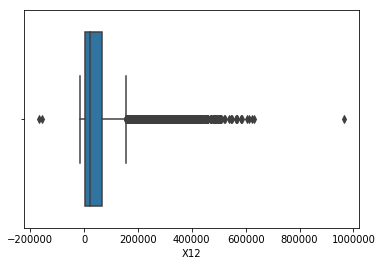

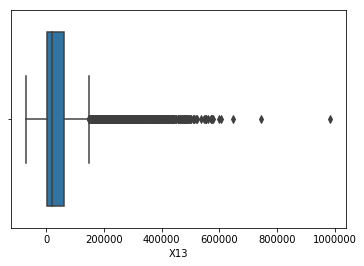

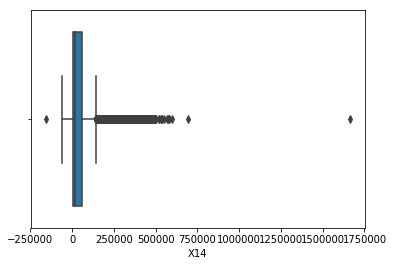

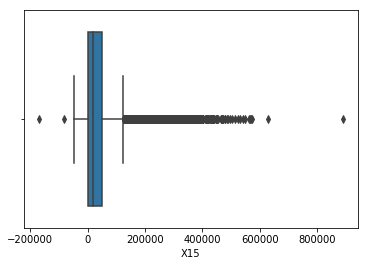

In [0]:
for col in ['X12', 'X13', 'X14', 'X15']:
  sns.boxplot(ntrain[col], )
  plt.show()

In [0]:
ntrain.drop('Ref.No', axis=1, inplace=True)

In [0]:
ntrain.head()

,X1,X2,X3,X4,X5,X6,X7,Y,X8,X9,X10,X11,X12,X13,X14,X15
0,320000,2,1,2,27,1,2,1,2,2,2,2,43243,42537,41370,40694
1,470000,1,2,1,41,-2,-2,0,-2,-2,-2,-1,13780,12242,32463,20621
2,20000,1,2,2,25,1,2,0,0,0,0,0,20415,18266,18921,19297
3,80000,1,3,1,41,0,0,1,0,0,0,-1,76015,77582,60311,62471
4,30000,1,1,2,30,1,-2,1,-2,-2,-2,-2,0,0,0,0


## Modelling

## Spliting the test and train data for modelling

In [0]:
x = ntrain.drop('Y', axis=1)
y = ntrain['Y']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=11, test_size=0.2)

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17280, 15)
(4320, 15)
(17280,)
(4320,)


## Scaling the data

In [0]:
s = StandardScaler()
st = s.fit_transform(x_train)
ste = s.fit_transform(x_test)

## Applying Logistic Regression model

In [0]:
lr = LogisticRegression()
lr.fit(st, y_train)
pred_lr = lr.predict(ste)

In [0]:
accuracy_score(y_test, pred_lr)

0.805787037037037

## So we are going to use GridSearchCV for having the best parameters

In [0]:
# param = {'random_state': range(1, 15), 'max_iter': [80, 90, 100, 110, 120], 'penalty': ['l1', 'l2']}

# grid1 = GridSearchCV(estimator=lr, param_grid=param, cv=5, scoring='accuracy')
# grid1.fit(st,y_train)
# print(grid1.best_params_)

In [0]:
lr = LogisticRegression(penalty='l1', max_iter=80, random_state=1)
lr.fit(st, y_train)
pred_lr = lr.predict(ste)

In [0]:
accuracy_score(y_test, pred_lr)

0.805787037037037

## even after using GridSearchCV there isn't any change in accuracy so we have to go for another model that is Random Forest

## Applying RandomForest model

In [0]:
rf = RandomForestClassifier()
rf.fit(st, y_train)
pred_rf = rf.predict(ste)

In [0]:
accuracy_score(y_test, pred_rf)

0.7893518518518519

## So as we can see that the accuracy that we obtained by using random forest is less than logistic regression base model, we have to find the best parameter using GridSearchCv 

In [0]:
# param = {'n_estimators': range(10,25),'criterion':['gini','entropy'], 'max_depth': range(2, 7)}

# grid1 = GridSearchCV(estimator=rf, param_grid=param, cv=5, scoring='accuracy')
# grid1.fit(st,y_train)
# print(grid1.best_params_)

In [0]:
rf = RandomForestClassifier(n_estimators=24,max_depth=6, criterion='entropy', verbose=0, n_jobs=-1, random_state=10)
rf.fit(st, y_train)
pred_rf = rf.predict(ste)

In [0]:
accuracy_score(y_test, pred_rf)

0.8138888888888889

### After obtaining best parameters and and modelling accordingly we gonna feed test data in this model

In [0]:
citi_test = pd.read_csv(path1)

In [0]:
req = citi_test.iloc[:, 1:16]

In [0]:
req.shape

(2399, 15)

In [0]:
s =StandardScaler()
req_s = s.fit_transform(req)

In [0]:
req_s.shape

(2399, 15)

In [0]:
pred_rf_f = rf.predict(req_s)

In [0]:
# # submission
# sample = pd.read_csv("/content/drive/My Drive/Colab Notebooks/sample_submission.csv")
# solution = pd.DataFrame({'ref.no':sample['Ref.No'], 'Y':pred_rf_f})
# # export to kaggle
# solution.to_csv('citi_rf(tunned).csv', index= False)

# Train 3 Dataset

In [0]:
train3 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_3.csv')

In [0]:
train3.head()

,Ref.No,X16,X17,X18,X19,X20,X21,X22,X23
0,22203,39606,38680,2000,1500,2000,1500,1500,0
1,1288,13711,8294,12300,32520,34,68,8334,45684
2,11822,18926,17717,1264,1249,625,700,1000,1000
3,15085,21071,2099,3008,3000,5000,10000,2099,0
4,6192,0,0,0,0,0,0,0,0


In [0]:
train3.shape

(21600, 9)

## Train 3 is the last set of data and in order to get the entire idea we have to merge the entire data together as 'rn'

In [0]:
ntrain = pd.merge(citi, train2, on='Ref.No')

In [0]:
rn = pd.merge(ntrain, train3, on='Ref.No')

In [0]:
rn.head()

,Ref.No,X1,X2,X3,X4,X5,X6,X7,Y,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,22203,320000,2,1,2,27,1,2,1,2,2,2,2,43243,42537,41370,40694,39606,38680,2000,1500,2000,1500,1500,0
1,1288,470000,1,2,1,41,-2,-2,0,-2,-2,-2,-1,13780,12242,32463,20621,13711,8294,12300,32520,34,68,8334,45684
2,11822,20000,1,2,2,25,1,2,0,0,0,0,0,20415,18266,18921,19297,18926,17717,1264,1249,625,700,1000,1000
3,15085,80000,1,3,1,41,0,0,1,0,0,0,-1,76015,77582,60311,62471,21071,2099,3008,3000,5000,10000,2099,0
4,6192,30000,1,1,2,30,1,-2,1,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0


### Ref.No is of no use as mentioned earlier we gonna drop is as well

In [0]:
rn.drop('Ref.No', axis=1, inplace=True)

In [0]:
rn.head()

,X1,X2,X3,X4,X5,X6,X7,Y,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,320000,2,1,2,27,1,2,1,2,2,2,2,43243,42537,41370,40694,39606,38680,2000,1500,2000,1500,1500,0
1,470000,1,2,1,41,-2,-2,0,-2,-2,-2,-1,13780,12242,32463,20621,13711,8294,12300,32520,34,68,8334,45684
2,20000,1,2,2,25,1,2,0,0,0,0,0,20415,18266,18921,19297,18926,17717,1264,1249,625,700,1000,1000
3,80000,1,3,1,41,0,0,1,0,0,0,-1,76015,77582,60311,62471,21071,2099,3008,3000,5000,10000,2099,0
4,30000,1,1,2,30,1,-2,1,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0


## Pre-processing

In [0]:
rn.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,21581.0,165198.261434,129012.556322,10000.0,50000.0,140000.0,230000.0,1000000.0
X2,21581.0,1.626940,0.483629,1.0,1.0,2.0,2.0,2.0
X3,21581.0,1.846254,0.781205,0.0,1.0,2.0,2.0,6.0
X4,21581.0,1.558732,0.522027,0.0,1.0,2.0,2.0,3.0
X5,21581.0,35.383254,9.267383,21.0,28.0,34.0,41.0,79.0
X6,21581.0,-0.003244,1.126021,-2.0,-1.0,0.0,0.0,8.0
X7,21581.0,-0.122654,1.201218,-2.0,-1.0,0.0,0.0,8.0
Y,21581.0,0.223808,0.416805,0.0,0.0,0.0,0.0,1.0
X8,21581.0,-0.155924,1.203030,-2.0,-1.0,0.0,0.0,8.0
X9,21581.0,-0.213011,1.164699,-2.0,-1.0,0.0,0.0,8.0


### Checking for missing values

In [0]:
rn.isna().sum().sum()

0

### Checking for duplicate entries

In [0]:
dup = rn.duplicated()

In [0]:
dup.value_counts()

False    21581
dtype: int64

### Beacuse of the availability of duplicate rows in our dataset that is 19 rows, we gonna drop them as they are redundant for our dataset

In [0]:
rn.drop_duplicates(inplace=True)

In [0]:
rn.shape

(21581, 24)

## below is given the for loop that show displays the boxplots of all the variables which are actually the amount repayed from customer to the bank

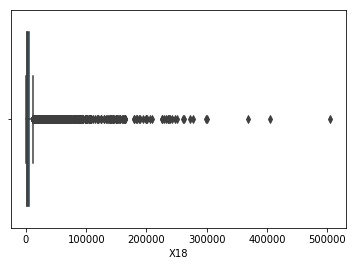

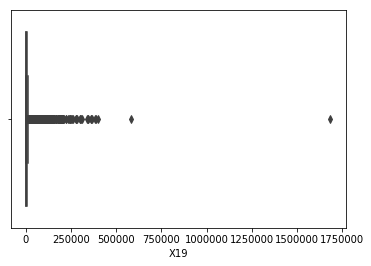

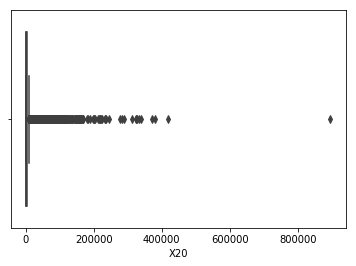

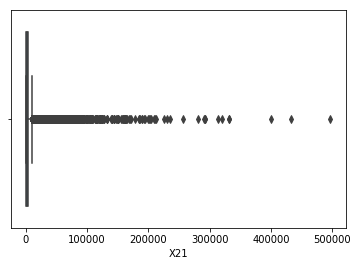

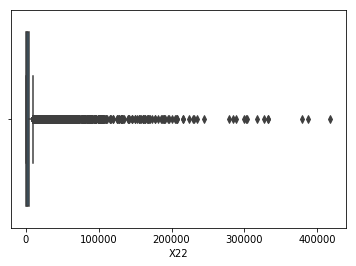

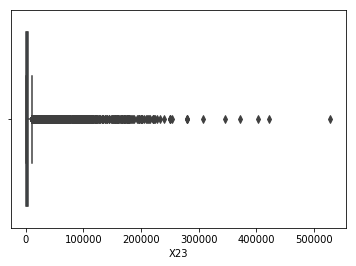

In [0]:
for col in rn.iloc[:, 18:24]:
  sns.boxplot(rn[col], )
  plt.show()

### As we can see that all the boxplot are highly right scewed thats because all the customer made really small amount of repayment back to the bank which in turn is beneficial for the bank and all these customer will be the target population from bank point of view

## Spliting the data in train and test by using train_test_split

In [0]:
x = rn.drop('Y', axis=1)
y = rn['Y']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=15, test_size=0.2)

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17264, 23)
(4317, 23)
(17264,)
(4317,)


## Scaling our data using Standard Scaler

In [0]:
ss = StandardScaler()
sc_tr = ss.fit_transform(x_train)
sc_te = ss.fit_transform(x_test)

# Modelling

### Bagging classifier model

In [0]:
bagg = BaggingClassifier(base_estimator=RandomForestClassifier())
bagg.fit(sc_tr, y_train)
pred_bagg = bagg.predict(sc_te)

In [0]:
accuracy_score(y_test, pred_bagg)

0.8105165624276117

### AdaBoost Classifier

In [0]:
ada = AdaBoostClassifier(base_estimator=RandomForestClassifier())
ada.fit(sc_tr, y_train)
pred_ada = ada.predict(sc_te)

In [0]:
accuracy_score(y_test, pred_ada)

0.8112114894602733

### Decision Tree Classifier

In [0]:
dt1 = DecisionTreeClassifier()
dt1.fit(sc_tr, y_train)
pred_dt1 = dt1.predict(sc_te)

In [0]:
accuracy_score(y_test, pred_ada)

0.8112114894602733

### Gradient Boosting Classifier

In [0]:
gra = GradientBoostingClassifier(learning_rate=0.1)
gra.fit(sc_tr, y_train)
pred_gra = gra.predict(sc_te)

In [0]:
accuracy_score(y_test, pred_gra)

0.8146861246235811

### Hyperparameter tuning for gradient boosting using GridSearchCV

In [0]:
# param = {'n_estimators': [85, 90, 95, 100, 105, 110],'learning_rate': [0.001, 0.01, 0.1, 0.02, 0.2, 1 ], 'loss': ['deviance', 'exponential']}

# grid1 = GridSearchCV(estimator=gra, param_grid=param, cv=5, scoring='accuracy')
# grid1.fit(sc_tr,y_train)
# print(grid1.best_params_)

In [0]:
gra = GradientBoostingClassifier(learning_rate=0.2, loss= 'exponential', n_estimators=85)
gra.fit(sc_tr, y_train)
pred_gra_t = gra.predict(sc_te)

In [0]:
accuracy_score(y_test, pred_gra_t)

0.8163076210331248

### Using Ensemble technique for classification problem i.e. Voting Classifier

In [0]:
vote = VotingClassifier(estimators=[('Decision Tree', dt), ('Logistic Regression', lr), ('Random Forest', rf), ('Bagging',bagg),
                                   ('Adaboost', ada), ('Decision Tree 1', dt1), ('Gradient boost', gra)], voting='hard', n_jobs=-1)

vote.fit(sc_tr, y_train)
pred_vote = vote.predict(sc_te)

In [0]:
accuracy_score(y_test, pred_vote)

0.8193189715079917

### Again feeding test data to our final Voting  Classifier model

In [0]:
citi_test = pd.read_csv(path1)

In [0]:
citi_test.head()

,Ref.No,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,17083,50000,2,1,2,25,0,0,0,0,0,0,45342,44719,40002,38008,31898,20154,2000,5040,8034,3029,5000,49436,NaN
1,3494,120000,2,2,2,24,0,0,0,0,0,-1,11296,12200,11761,6761,7189,1087,1400,1000,0,1000,1087,801,NaN
2,21945,120000,2,2,2,27,1,-2,-1,-1,-2,-2,0,0,2382,0,0,0,0,2382,0,0,0,0,NaN
3,3499,60000,1,1,2,28,0,-1,0,0,-1,2,2295,5293,13421,9900,310,160,6000,10000,900,310,0,3400,NaN
4,18973,100000,2,1,2,28,3,2,0,0,2,0,49961,48856,49899,53407,51951,53195,0,1831,4339,0,2083,1939,NaN


In [0]:
req = citi_test.drop(['Ref.No', 'Y'], axis=1)

In [0]:
req.shape

(2399, 23)

In [0]:
s =StandardScaler()
req_s = s.fit_transform(req)

In [0]:
req_s.shape

(2399, 23)

In [0]:
pred_bagg_f = bagg.predict(req_s)

In [0]:
pred_ada_f = ada.predict(req_s)

In [0]:
pred_dt1_f = dt1.predict(req_s)

In [0]:
pred_gra_t_f = gra.predict(req_s)

In [0]:
pred_vote_f = vote.predict(req_s)

In [0]:
# # submission
# sample = pd.read_csv("/content/drive/My Drive/Colab Notebooks/sample_submission.csv")
# solution = pd.DataFrame({'ref.no':sample['Ref.No'], 'Y':pred_vote_f})
# # export to kaggle
# solution.to_csv('citi_vote(eda(2)).csv', index= False)